# Linear Regression Lab 1

#### Import Pytorch Libraries

In [20]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

#### Generate random data
x: input of 100 random floats between -10.0 and 10.0  
y: 2*x + 5 + (10% random noise)

In [21]:
# TODO: store tensor of size 100 in variable x
## x = ...

# TODO: apply f(x) = 2x + 5 and store in variable y
## y = ... x ...

# Add some noise to our data
noise_ratio = 0.2 * torch.rand(100) - 0.1
y_range = torch.max(y) - torch.min(y)
noise = noise_ratio * y_range
y = y + noise

print(x.size(), y.size())

torch.Size([100]) torch.Size([100])


#### Plot randomly generated data

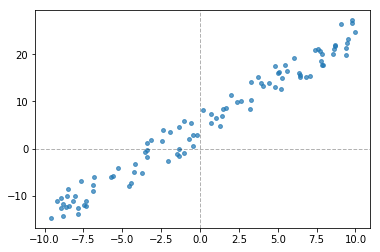

In [22]:
plt.scatter(x.numpy(), y.numpy(), alpha=0.7, s=15)
plt.axhline(0, color="black", linestyle="--", alpha=0.3, linewidth=1)
plt.axvline(0, color="black", linestyle="--", alpha=0.3, linewidth=1)
plt.show()

#### Initialize parameters

In [23]:
# TODO: randomly initialize weight parameter tensor and store in variable w
## w = ..., requires_grad=True)

# TODO: randomly initialize bias parameter tensor and store in variable b
## b = ..., requires_grad=True


#### Gradient iterative descent

In [24]:
lr = 0.001
for i in range(0, 10000):
    # TODO: calculate our model prediction using tensor w and tensor b and store in variable y_pred
    ## y_pred = ... x ...
    
    l2 = torch.mean(torch.pow(y - y_pred, 2))
    if i%1000 == 0:
        print("mseloss:", l2.item())
        print("params:[{}, {}]".format(w.item(), b.item()))
    l2.backward()
    w = w - (lr * w.grad)
    b = b - (lr * b.grad)
    w = torch.tensor([w.item()], requires_grad=True)
    b = torch.tensor([b.item()], requires_grad=True)
print("finished training")

mseloss: 159.72410583496094
params:[0.08672350645065308, 0.36866265535354614]
mseloss: 4.756180763244629
params:[1.954541563987732, 4.202793598175049]
mseloss: 4.402024745941162
params:[1.948387622833252, 4.722842216491699]
mseloss: 4.395432949066162
params:[1.9475480318069458, 4.79379415512085]
mseloss: 4.395309925079346
params:[1.947433352470398, 4.803474426269531]
mseloss: 4.395307540893555
params:[1.9474183320999146, 4.804779529571533]
mseloss: 4.395307540893555
params:[1.947417140007019, 4.804884910583496]
mseloss: 4.395307540893555
params:[1.947417140007019, 4.804884910583496]
mseloss: 4.395307540893555
params:[1.947417140007019, 4.804884910583496]
mseloss: 4.395307540893555
params:[1.947417140007019, 4.804884910583496]
finished training


y_actual = 2(x) + 5
y_pred = 1.947417140007019(x) + 4.804884910583496


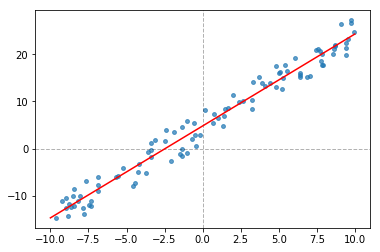

In [25]:
plt.scatter(x.numpy().reshape(100), y.numpy().reshape(100), alpha=0.7, s=15)
plt.axhline(0, color="black", linestyle="--", alpha=0.3, linewidth=1)
plt.axvline(0, color="black", linestyle="--", alpha=0.3, linewidth=1)
x_pred = np.linspace(-10, 10, 100)
print("y_actual = {}(x) + {}".format(2, 5))
print("y_pred = {}(x) + {}".format(w.item(), b.item()))
y_pred = (w.item() * x_pred) + b.item()
plt.plot(x_pred, y_pred, color="red")
plt.show()